In [1]:
%matplotlib inline 

from numpy import loadtxt, mean, std, invert
from matplotlib.pyplot import scatter

**Part A: Load the numerical portion of the data and plot an attribute space representation of the data set**

In [2]:
kepler_data = loadtxt('./kepler_selection.csv', skiprows=1, delimiter=",")
kepler_data.shape

(9564, 2)

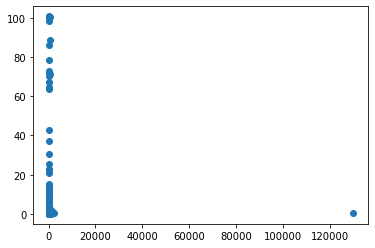

In [3]:
attribute_space = scatter(kepler_data[:, 0], kepler_data[:, 1])

The resulting plot is not very useful towards understanding the distribution of the data in the space of attributes. This is because the outliers greatly distory the chart which makes it nearly impossible to identify any real trends in the data. 

**Part B: In this case we define an outlier as a point (x, y) such that the corresponding z-value for the x component only satisfies |z| > 5**

In [4]:
def standardize(x, x_bar, std):
    
    standardized = (x - x_bar) / std
    
    return standardized 

In [5]:
def isOutlier(x, x_bar, stdev):
    
    return abs(standardize(x, x_bar, stdev)) > 5
    

In [6]:
x = kepler_data[:, 0]
x

array([ 9.48803557, 54.4183827 , 19.89913995, ...,  1.73984941,
        0.68140161,  4.85603482])

In [7]:
x_bar = mean(x)
x_bar

75.67135842490904

In [8]:
stdev = std(x)
stdev

1334.674264645049

In [9]:
outliers = [isOutlier(x_i, x_bar, stdev) for x_i in x]
outliers

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [10]:
num_outliers = sum(outliers)
num_outliers

1

**Part C: Use boolean indexing to pre-process the kepler data by keeping only the data instances that are not outliers. Generate an attribute space view of the set of non-outliers**

In [11]:
non_outliers = kepler_data[invert(outliers)]
# non_outliers = kepler_data[standardize(kepler_data[:], x_bar, stdev) > 5]
non_outliers

array([[9.48803557e+00, 1.46000000e-01],
       [5.44183827e+01, 5.86000000e-01],
       [1.98991399e+01, 9.69000000e-01],
       ...,
       [1.73984941e+00, 4.30000000e-02],
       [6.81401611e-01, 1.47000000e-01],
       [4.85603482e+00, 1.34000000e-01]])

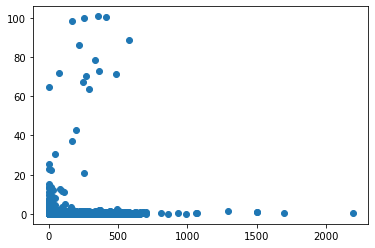

In [12]:
attribute_space = scatter(non_outliers[:, 0], non_outliers[:, 1])

The results are much better for providing a good view of the data. Before, the outlier skewed how our data looked on the plot, so we could not see any real trends in the data we actually cared about. By removing it, however, we are able to better see the patterns/trends that we want to see in the relevant data.

**Question #4**